In [2]:
import numpy as np
import soundfile as sf
from IPython.display import Audio
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

# PART 1

-  Fill the skeleton functions below with the correct code
-  Find the math functions for the square, triangular and sawtooth waves on the assignment pdf
-  Hint: some of this has been covered in class


### NOTE:
When selecting odd overtones make sure we process a correct amount of odd overtones corresponding to 'number_overtones' instead of stopping the function at the overtone count equal to 'number_overtones'. 

E.g. if we want 3 odd overtones, we need to stop the loop at overtone 7 (f0 + f3 + f5 + f7 ), Not at overtone 3 ( f0 + f3 ).

In [2]:
def sinewave(fs,duration,f0, phase):
    
    time_vector = np.arange(0,duration,1/fs)
    w0 = 2*np.pi*f0
    signal = np.sin(w0*time_vector)
    
    return time_vector, signal

In [3]:
def cosinewave(fs,duration,f0, phase):
    
    time_vector = np.arange(0,duration,1/fs)
    w0 = 2*np.pi*f0
    signal = np.sin(-w0*time_vector+np.pi/2)
    
    return time_vector, signal

In [4]:
def squarewave(fs,duration,f0,number_overtones, phase):
    
    # Initialize time vector
    time_vector = np.arange(0,duration,1/fs)
    
    # Create placeholder array where to plug the wave harmonics in
    signal = np.zeros(fs*duration) # mono, 1 channel
   
    # Synthesis loop
    for k in range(1,(number_overtones+1)*2+1,2):
        signal = signal + np.sin(2*np.pi*time_vector*f0*k)/k
    return time_vector, signal

In [5]:
def triangularwave(fs,duration,f0,number_overtones,phase):

    # Initialize time vector
    time_vector =np.arange(0,duration,1/fs)
    
    #angular frequency w = 2pif
    w0 = 2*np.pi*f0
    signal = np.zeros(fs*duration)
    
    
    for k in range(1,(number_overtones+1)*2+1,2):
        signal = signal + (-1)**((k-1)/2) * np.sin(k*w0*time_vector)/k**2

    return time_vector, signal 

In [6]:
def sawtoothwave(fs,duration,f0,number_overtones,phase):
    
    time_vector =np.arange(0,duration,1/fs)
    w0 = 2*np.pi*f0
    signal = np.zeros(fs*duration)
    
    for k in range(1,(number_overtones+1)*2+1):
        signal = signal - np.sin(k*w0*time_vector)/k 
    
    return time_vector, signal

# PART 2

-  Use the functions above to plot and display audio for each waveform
-  Remember to plot against time (use the time_vector) and label the plot
-  Use plt.xlim to diplay only 2 periods of the waveform

Sine wave at fs = 2000 Hz


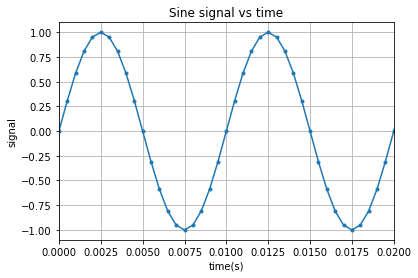

In [7]:
#Parameters
fs = 2000
f0 = 100
duration = 2
phase = 0

t,y = sinewave(fs,duration,f0,phase) 

#plotting
plt.plot(t,y,'.-')
plt.xlim([0,2/f0])
plt.xlabel('time(s)')
plt.ylabel('signal')
plt.title('Sine signal vs time')
plt.grid()

print('Sine wave at fs = {} Hz'.format(fs))
Audio(y,rate=fs)

Cosine wave at fs = 10000 Hz


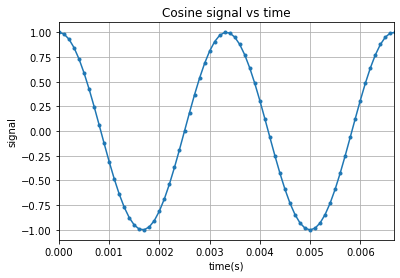

In [8]:
#Parameters
fs = 10000
f0 = 300
duration = 2
phase = np.pi/2

t,y = cosinewave(fs,duration,f0,phase)

#plotting
plt.plot(t,y,'.-')
plt.xlim([0,2/f0])
plt.xlabel('time(s)')
plt.ylabel('signal')
plt.title('Cosine signal vs time')
plt.grid()

print('Cosine wave at fs = {} Hz'.format(fs))
Audio(y,rate=fs)


Square wave at fs = 10000 Hz


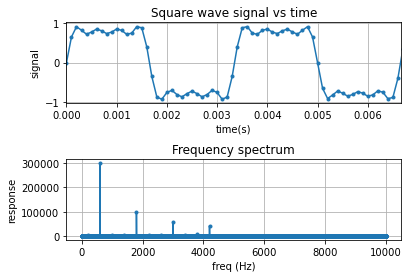

In [9]:
#Parameters
fs = 10000
f0 = 300
duration = 60
phase = 0
number_overtones = 60

t,x = squarewave(fs,duration,f0,number_overtones,phase)

#Extra Credit 2
f_cutoff = fs//2 # set the Nyquist frequency as the cutoff frequency
X = np.fft.rfft(x) # Take FFT of signal 

freqs = np.fft.rfftfreq(len(x), 1/(2*fs)) # Returns the DFT sample frequencies
X[freqs >= f_cutoff] = 0 # Filter out any frequencies we don't need past f_Nyquist

y = np.fft.irfft(X) #Take the Inverse FFT to get our new filtered signal that prevents aliasing


#plotting
fig, [ax1,ax2] = plt.subplots(nrows = 2, ncols =1)

ax1.plot(t,y, '.-')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('signal')
ax1.set_title('Square wave signal vs time')
ax1.set_xlim([0,2/f0])
ax1.grid()

ax2.plot(freqs,np.abs(X),".-")
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('response')
ax2.set_title('Frequency spectrum')
ax2.grid()

plt.subplots_adjust(hspace=0.7)
plt.show

print('Square wave at fs = {} Hz'.format(fs))
Audio(x,rate=fs)

Triangle wave at fs = 16000 Hz


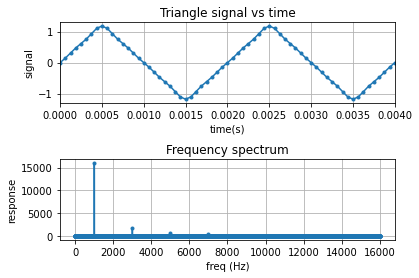

In [10]:
#Parameters
fs = 16000
f0 = 500
duration = 2
phase = 0
number_overtones = 20

t,x = triangularwave(fs,duration,f0,number_overtones,phase)

#Extra Credit 2
f_cutoff = fs//2 # set the Nyquist frequency as the cutoff frequency
X = np.fft.rfft(x) # Take FFT of signal 

freqs = np.fft.rfftfreq(len(x), 1/(2*fs)) # Returns the DFT sample frequencies
X[freqs >= f_cutoff] = 0 # Filter out any frequencies we don't need past f_Nyquist

y = np.fft.irfft(X) #Take the Inverse FFT to get our new filtered signal that prevents aliasing


#plotting
fig, [ax1,ax2] = plt.subplots(nrows = 2, ncols =1)

ax1.plot(t,y, '.-')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('signal')
ax1.set_title('Triangle signal vs time')
ax1.set_xlim([0,2/f0])
ax1.grid()

ax2.plot(freqs,np.abs(X),".-")
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('response')
ax2.set_title('Frequency spectrum')
ax2.grid()

plt.subplots_adjust(hspace=0.7)
plt.show

print('Triangle wave at fs = {} Hz'.format(fs))
Audio(y,rate=fs)

Sawtooth wave at fs = 16000 Hz


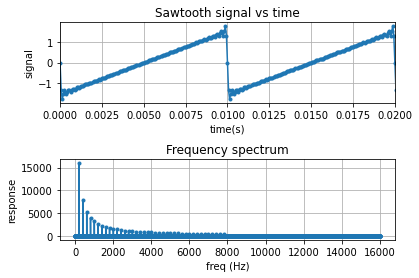

In [11]:
#Parameters
fs = 16000
f0 = 100
duration = 2
phase = 0
number_overtones = 20

t,x = sawtoothwave(fs,duration,f0,number_overtones,phase)

#Extra Credit 2
f_cutoff = fs//2 # set the Nyquist frequency as the cutoff frequency
X = np.fft.rfft(x) # Take FFT of signal 

freqs = np.fft.rfftfreq(len(x), 1/(2*fs)) # Returns the DFT sample frequencies
X[freqs >= f_cutoff] = 0 # Filter out any frequencies we don't need past f_Nyquist

y = np.fft.irfft(X) #Take the Inverse FFT to get our new filtered signal that prevents aliasing


#plotting
fig, [ax1,ax2] = plt.subplots(nrows = 2, ncols =1)

ax1.plot(t,y, '.-')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('signal')
ax1.set_title('Sawtooth signal vs time')
ax1.set_xlim([0,2/f0])
ax1.grid()

ax2.plot(freqs,np.abs(X),".-")
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('response')
ax2.set_title('Frequency spectrum')
ax2.grid()

plt.subplots_adjust(hspace=0.7)
plt.show


print('Sawtooth wave at fs = {} Hz'.format(fs))
display(Audio(y,rate=fs))

# Part 3

# Extra Credit - Noise Generator

- Fill the function, plot and display

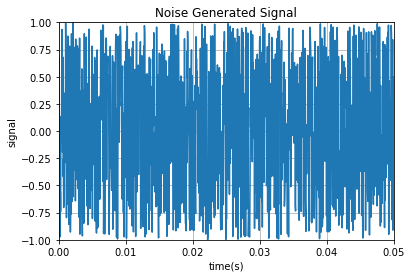

In [4]:
def noise_gen(fs,duration):
    
    #Initialize time array
    time_vector = np.arange(0,duration,1/fs)
    
    signal = 2*np.random.rand(len(time_vector))-1
    return time_vector, signal

#Parameters
fs = 24000
duration = 2


t, noise = noise_gen(fs,duration) 

plt.figure()
plt.plot(t,noise)
plt.title('Noise Generated Signal')
plt.xlabel('time(s)')
plt.ylabel('signal')
plt.grid()
plt.ylim([-1,1])
plt.xlim([0,0.05])
Audio(noise, rate=fs)

## Unit Test (for graders -- do not edit or delete) 

In [13]:
time_vector, sine_test = sinewave(4,1,1,0)
assert np.allclose(sine_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Sinewave OK!')

Sinewave OK!


In [14]:
time_vector, cosine_test = cosinewave(4,1,1,0)
assert np.allclose(cosine_test, np.array([1, 0, -1, 0]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Cosinewave OK!')

Cosinewave OK!


In [15]:
time_vector, squarewave_test = squarewave(4, 1, 1, 10, 0)
squarewave_test = squarewave_test/np.max(np.abs(squarewave_test))
assert np.allclose(squarewave_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Squarewave OK!')

Squarewave OK!


In [16]:
time_vector, triangularwave_test = triangularwave(4, 1, 1, 10, 0)
triangularwave_test = triangularwave_test/np.max(np.abs(triangularwave_test))
assert np.allclose(triangularwave_test, np.array([0, 1, 0, -1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Triang OK!')

Triang OK!


In [17]:
time_vector, sawtoothwave_test = sawtoothwave(4, 1, 1, 10, 0)
sawtoothwave_test = sawtoothwave_test/np.max(np.abs(sawtoothwave_test))
assert np.allclose(sawtoothwave_test, np.array([0, -1, 0, 1]))
assert np.allclose(time_vector, np.array([0, 0.25, 0.5, 0.75] ))

print('Sawtooth OK!')

Sawtooth OK!
